In [27]:
from fastai.collab import *
from fastai.tabular.all import *
from time import *
from sklearn import *

In [28]:
path = Path('.')
df = pd.read_csv(path/'training_data.csv', delimiter=',', engine='python',
                     header=0)

In [29]:
cloud_levels = 'overcast clouds', 'broken clouds', 'scattered clouds', 'few clouds', 'clear sky'

In [30]:
df['cloud'] = df['cloud'].astype('category')
df['cloud'].cat.set_categories(cloud_levels, ordered=True, inplace=True)

In [31]:
df.drop(labels='date', axis=1, inplace=True)
df.head()

,temp,cloud,rain,wind,humidity,barometer,daily_power
0,12.333333,overcast clouds,no rain,21.333333,89.333333,1007.866667,5.6
1,7.787234,scattered clouds,no rain,17.212766,81.425532,1009.170213,2.5
2,8.208333,overcast clouds,rain,32.354167,78.229167,1007.916667,7.6
3,7.354167,broken clouds,no rain,26.375000,71.041667,1012.687500,15.1
4,8.292683,broken clouds,rain,39.170732,77.804878,998.219512,13.1


In [32]:
cont_df,cat_df = cont_cat_split(df, max_card = 15, dep_var = 'daily_power')

In [33]:
procs_nn = [Categorify, Normalize]
splits = RandomSplitter(0.1)(range_of(df))

In [34]:
to_dt = TabularPandas(df, procs_nn, cat_df, cont_df, splits=splits, y_names='daily_power')

In [35]:
len(to_dt.train), len(to_dt.valid)

(2578, 286)

In [36]:
xs,y = to_dt.train.xs, to_dt.train.y
valid_xs, valid_y = to_dt.valid.xs, to_dt.valid.y

In [42]:
m = tree.DecisionTreeRegressor(min_samples_leaf=60)
m.fit(xs,y)

DecisionTreeRegressor(min_samples_leaf=60)

In [43]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [44]:
m_rmse(m, xs, y)

6.808352

In [45]:
m_rmse(m, valid_xs, valid_y)

7.156815

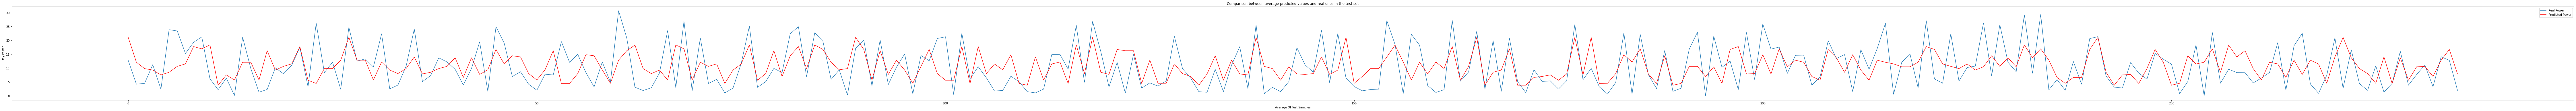

In [46]:
plt.figure(figsize=(160,6))
plt.plot(range(len(valid_y)), valid_y)
plt.plot(range(len(m.predict(valid_xs))), m.predict(valid_xs), 'r')
plt.title('Comparison between average predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.xlabel('Average Of Test Samples')
plt.legend(['Real Power', 'Predicted Power'])
plt.show()

In [47]:
def rf(xs, y, n_estimators=100, max_samples=500, max_features=0.5, min_samples_leaf=5, **kwargs):
    return ensemble.RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators, max_samples=max_samples,
                                max_features=max_features, min_samples_leaf=min_samples_leaf,
                                oob_score=True).fit(xs, y)

In [48]:
trees = rf(xs, y)

In [49]:
m_rmse(trees, xs, y)

6.453343

In [50]:
m_rmse(trees, valid_xs, valid_y)

6.952167

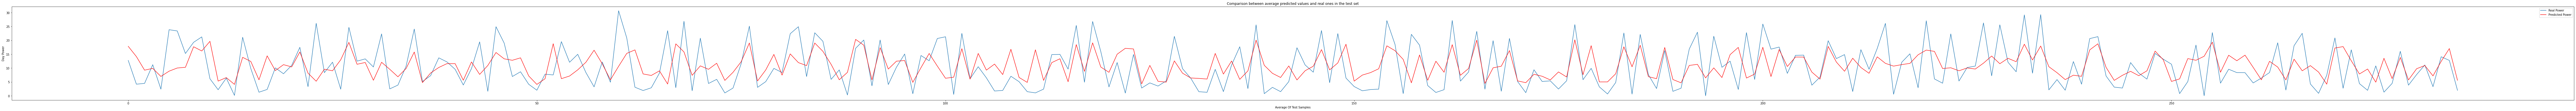

In [51]:
plt.figure(figsize=(160,6))
plt.plot(range(len(valid_y)), valid_y)
plt.plot(range(len(trees.predict(valid_xs))), trees.predict(valid_xs), 'r')
plt.title('Comparison between average predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.xlabel('Average Of Test Samples')
plt.legend(['Real Power', 'Predicted Power'])
plt.show()